In [1]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

data = np.loadtxt('RF3_Torre_15J.rpt', skiprows=4)

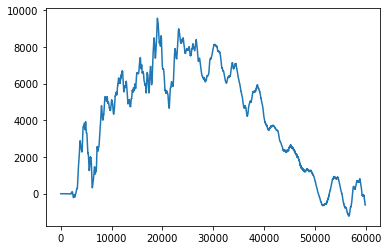

In [2]:
# plot the data
plt.plot(data[:,1]);

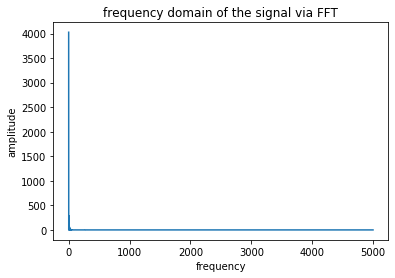

In [3]:
# time in data is in ms, pass it to s and
# compute the frequency
samplingFrequency = 1 / (np.mean(np.diff(data[:,0])) * 1000)  
samplingInterval = 1  # / samplingFrequency;
beginTime = 0
endTime = np.mean(np.diff(data[:,0])) * len(data[:,0])

time = np.arange(beginTime, endTime, samplingInterval);

amplitude = data[:,1]

fourierTransform = np.fft.fft(amplitude) / len(amplitude)
# frequencies appear "duplicated" when using fft
# so we only get half of the data
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] 

# compute the frequencies for the x-axis
tpCount = len(amplitude)
values = np.arange(int(tpCount/2))
timePeriod = tpCount / samplingFrequency
frequencies = values / timePeriod

plt.plot(frequencies, abs(fourierTransform))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('frequency domain of the signal via FFT');

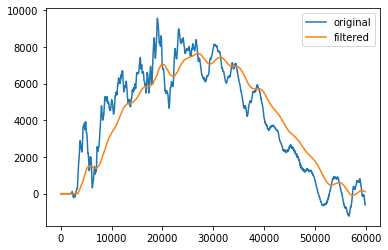

In [6]:
def butter_lowpass(interval, sampling_rate, cutoff, order=3):
    nyq = sampling_rate * 0.5

    stopfreq = float(cutoff)
    cornerfreq = 0.1 * stopfreq
    
    ws = cornerfreq / nyq
    wp = stopfreq / nyq
    
    N, wn = scipy.signal.buttord(ws, wp, gpass=1, gstop=10, analog=True)
    b, a = scipy.signal.butter(N, wn, btype='lowpass')
    sf = scipy.signal.lfilter(b, a, interval)
    
    return sf

F_fourier = np.fft.fft(data[:,1]) / len(data[:,1])
filtered_data = butter_lowpass(interval=data[:,1], sampling_rate=1, cutoff=2.75e-4)

plt.plot(data[:,1], label='original')
plt.plot(filtered_data, label='filtered')
plt.legend(loc='best')